# Forecasting de Ventas
### Secuencia de procedimientos

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
!pip install holidays streamlit

Luego de instalar en el entorno a trabajar las librerías

Primero importamos las librerias en el Notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st

Luego importamos los datos de ventas que ya estan entrenados para la muestra.

In [4]:
ventas_path = "../data/raw/entrenamiento/ventas.csv"
competencia_path = "../data/raw/entrenamiento/competencia.csv"

df_ventas = pd.read_csv(ventas_path)
df_competencia = pd.read_csv(competencia_path)

In [5]:
print("***********************Ventas.***************************")
print(df_ventas.head())
print("\n*********************Competencia.************************")
print(df_competencia.head())

***********************Ventas.***************************
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20 

#### Cargando los datos

In [6]:
df_ventas.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


Identificando los tipos de datos en cada tabla...

In [7]:
df_ventas.columns

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos'],
      dtype='object')

In [8]:
df_competencia.columns

Index(['fecha', 'producto_id', 'Amazon', 'Decathlon', 'Deporvillage'], dtype='object')

In [9]:
# Informe de calidad de datos para el DataFrame de ventas
print('--- INFORME DE CALIDAD DE DATOS: VENTAS ---')
print('\nTipos de variables:')
print(df_ventas.dtypes)
print('\nValores nulos por columna:')
print(df_ventas.isnull().sum())
print('\nValores duplicados:')
print(df_ventas.duplicated().sum())
print('\nDescriptivos estadísticos:')
print(df_ventas.describe(include='all'))
print('\nResumen de filas y columnas:')
print(f'Filas: {df_ventas.shape[0]}, Columnas: {df_ventas.shape[1]}')
print('\nPrimeras filas:')
print(df_ventas.head())
print('\nÚltimas filas:')
print(df_ventas.tail())
print('\n--- FIN DEL INFORME ---')

--- INFORME DE CALIDAD DE DATOS: VENTAS ---

Tipos de variables:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

Valores duplicados:
0

Descriptivos estadísticos:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         14

In [10]:
df_ventas.describe(include='all')

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
count,3552,3552,3552,3552,3552,3552.000000,3552,3552.00000,3552.000000,3552.000000
unique,148,24,24,4,16,NaN,2,NaN,NaN,NaN
top,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,NaN,False,NaN,NaN,NaN
freq,24,148,148,1184,888,NaN,2516,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,123.125000,NaN,4.87866,121.816546,605.972323
std,NaN,NaN,NaN,NaN,NaN,165.576753,NaN,6.31102,164.017963,1079.071192
min,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,1.00000,19.000000,19.460000
25%,NaN,NaN,NaN,NaN,NaN,48.750000,NaN,2.00000,47.212500,131.535000
50%,NaN,NaN,NaN,NaN,NaN,72.500000,NaN,3.00000,71.810000,216.570000
75%,NaN,NaN,NaN,NaN,NaN,118.750000,NaN,5.00000,118.220000,639.637500


In [11]:
# Convertir la columna 'fecha' a tipo datetime en ambos DataFrames
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
df_competencia['fecha'] = pd.to_datetime(df_competencia['fecha'])

In [12]:
# Verificar la conversión de fechas en ambos DataFrames
print('Tipo de df_ventas["fecha"]:', df_ventas['fecha'].dtype)
print('Primeras fechas en df_ventas:', df_ventas['fecha'].head())
print('Tipo de df_competencia["fecha"]:', df_competencia['fecha'].dtype)
print('Primeras fechas en df_competencia:', df_competencia['fecha'].head())

Tipo de df_ventas["fecha"]: datetime64[ns]
Primeras fechas en df_ventas: 0   2021-10-25
1   2021-10-25
2   2021-10-25
3   2021-10-25
4   2021-10-25
Name: fecha, dtype: datetime64[ns]
Tipo de df_competencia["fecha"]: datetime64[ns]
Primeras fechas en df_competencia: 0   2021-10-25
1   2021-10-25
2   2021-10-25
3   2021-10-25
4   2021-10-25
Name: fecha, dtype: datetime64[ns]


Tipos de Datos en Cada Dataframe (Ventas y Competencia)

In [13]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [14]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


Integrando los Dataframes existentes para crear un nuevo Dataframe.

In [15]:
# Integrar df_ventas y df_competencia en un nuevo DataFrame usando fecha y producto_id como claves
df_nuevo = pd.merge(df_ventas, df_competencia, on=['fecha', 'producto_id'], how='inner')
print('Dimensiones de df_nuevo:', df_nuevo.shape)
df_nuevo.head()

Dimensiones de df_nuevo: (3552, 13)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Análisis exploratorio de df_nuevo
A continuación se presentan diferentes análisis exploratorios y visualizaciones sobre el DataFrame `df_nuevo`.

In [16]:
# Resumen general del DataFrame df_nuevo
display(df_nuevo.info())
display(df_nuevo.describe(include='all'))
display(df_nuevo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
 10  Amazon             3552 non-null   float64       
 11  Decathlon          3552 non-null   float64       
 12  Deporvillage       3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(4)


None

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
count,3552,3552,3552,3552,3552,3552.000000,3552,3552.00000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
unique,NaN,24,24,4,16,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,148,148,1184,888,NaN,2516,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-05-13 18:00:00.000000256,NaN,NaN,NaN,NaN,123.125000,NaN,4.87866,121.816546,605.972323,118.623407,111.412182,118.894628
min,2021-10-25 00:00:00,NaN,NaN,NaN,NaN,20.000000,NaN,1.00000,19.000000,19.460000,16.850000,15.450000,16.770000
25%,2022-08-03 18:00:00,NaN,NaN,NaN,NaN,48.750000,NaN,2.00000,47.212500,131.535000,47.117500,43.285000,47.310000
50%,2023-05-13 12:00:00,NaN,NaN,NaN,NaN,72.500000,NaN,3.00000,71.810000,216.570000,73.180000,66.285000,72.700000
75%,2024-02-20 12:00:00,NaN,NaN,NaN,NaN,118.750000,NaN,5.00000,118.220000,639.637500,114.342500,111.172500,114.985000
max,2024-11-30 00:00:00,NaN,NaN,NaN,NaN,830.000000,NaN,85.00000,854.220000,14508.400000,858.350000,867.337500,932.325000


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


# Creando la visualizacion de datos

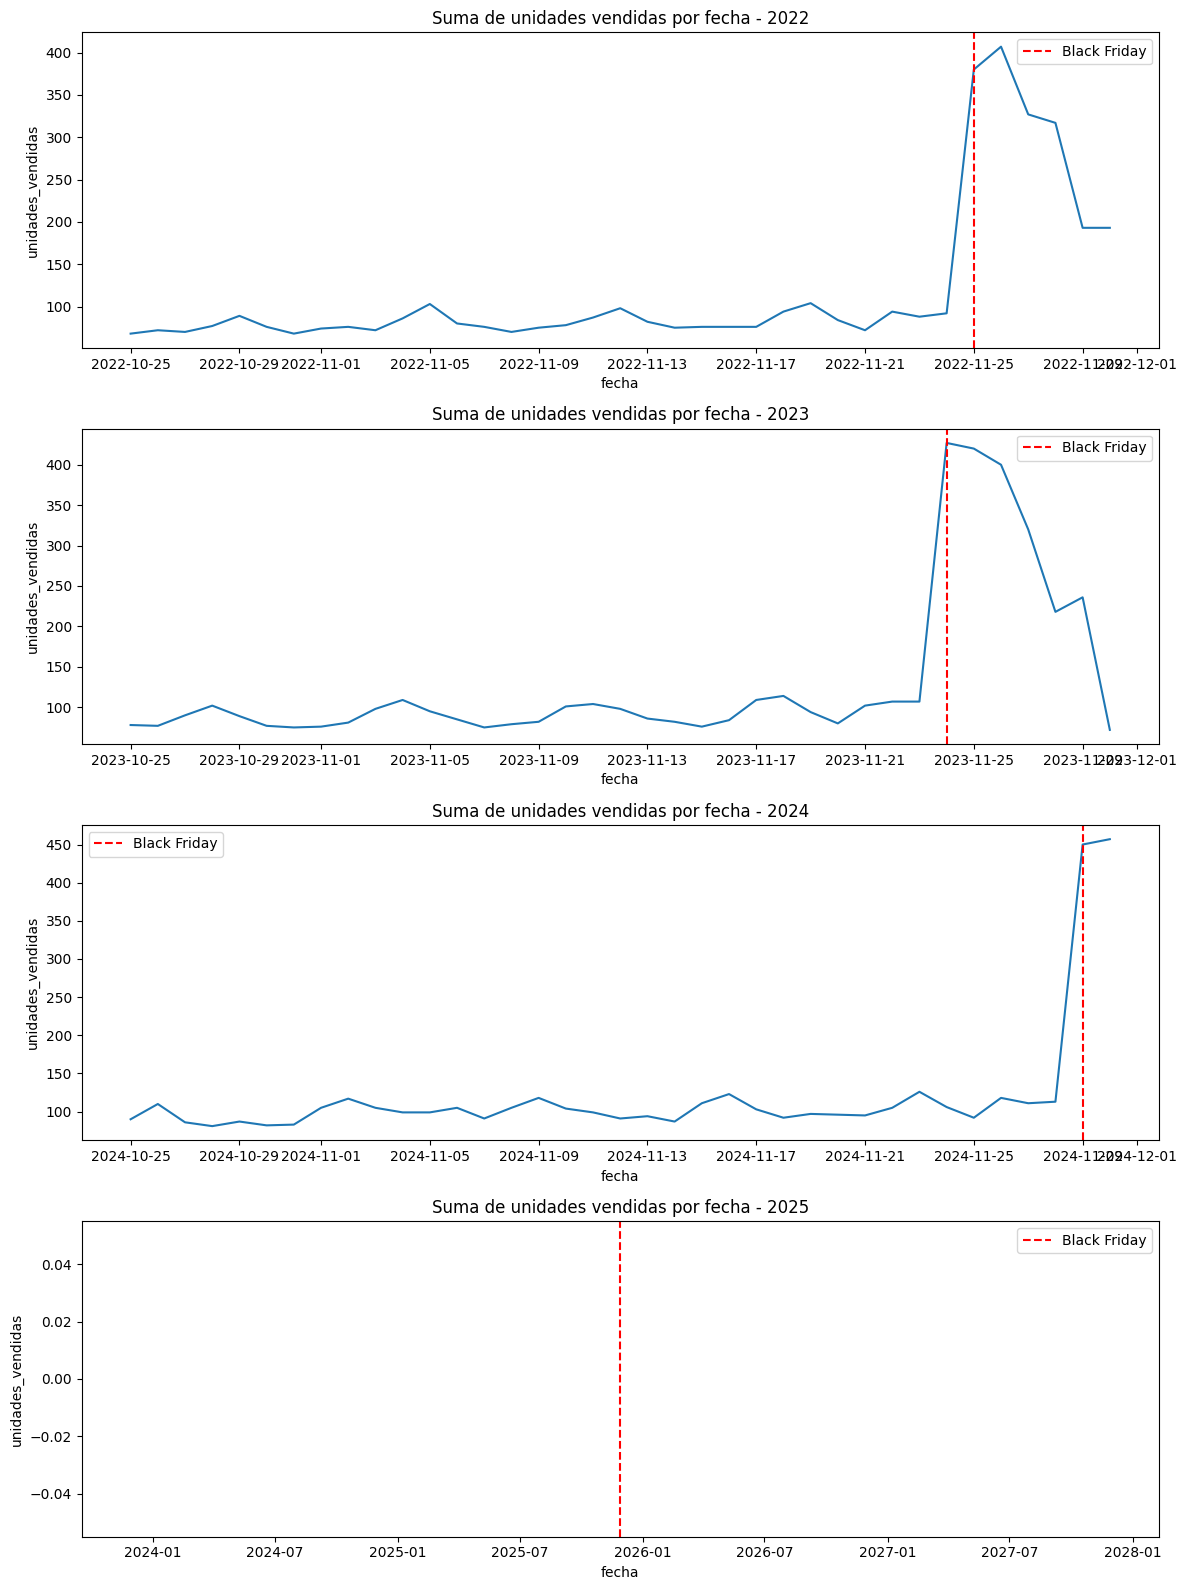

In [17]:
# Gráfico de líneas temporales por año con suma de unidades vendidas y marcando Black Fridays
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Asegurarse de que la columna 'fecha' es datetime
if not pd.api.types.is_datetime64_any_dtype(df_nuevo['fecha']):
    df_nuevo['fecha'] = pd.to_datetime(df_nuevo['fecha'])

# Definir fechas de Black Friday por año (ejemplo para 2022, 2023, 2024, 2025)
black_fridays = {
    2022: datetime(2022, 11, 25),
    2023: datetime(2023, 11, 24),
    2024: datetime(2024, 11, 29),
    2025: datetime(2025, 11, 28)
}

fig, axes = plt.subplots(len(black_fridays), 1, figsize=(12, 4 * len(black_fridays)), sharex=False)
for i, (year, bf_date) in enumerate(black_fridays.items()):
    df_year = df_nuevo[df_nuevo['fecha'].dt.year == year]
    ventas_por_fecha = df_year.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    ax = axes[i]
    sns.lineplot(data=ventas_por_fecha, x='fecha', y='unidades_vendidas', ax=ax)
    ax.axvline(bf_date, color='red', linestyle='--', label='Black Friday')
    ax.set_title(f'Suma de unidades vendidas por fecha - {year}')
    ax.legend()
plt.tight_layout()
plt.show()

C:\Users\dangmoz\AppData\Local\Temp\ipykernel_9776\83355858.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='viridis')


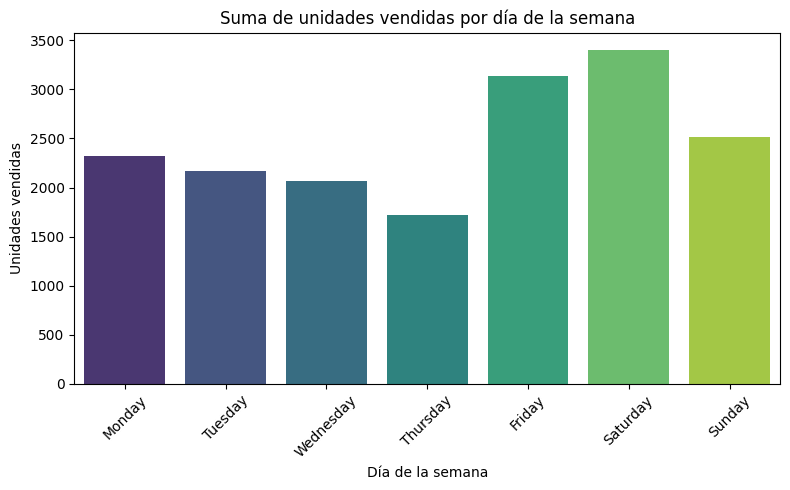

In [18]:
# Gráfico de suma de unidades vendidas por día de la semana
plt.figure(figsize=(8, 5))
df_nuevo['dia_semana'] = df_nuevo['fecha'].dt.day_name()
ventas_por_dia = df_nuevo.groupby('dia_semana')['unidades_vendidas'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='viridis')
plt.title('Suma de unidades vendidas por día de la semana')
plt.ylabel('Unidades vendidas')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dangmoz\AppData\Local\Temp\ipykernel_9776\1978511769.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='Reds')


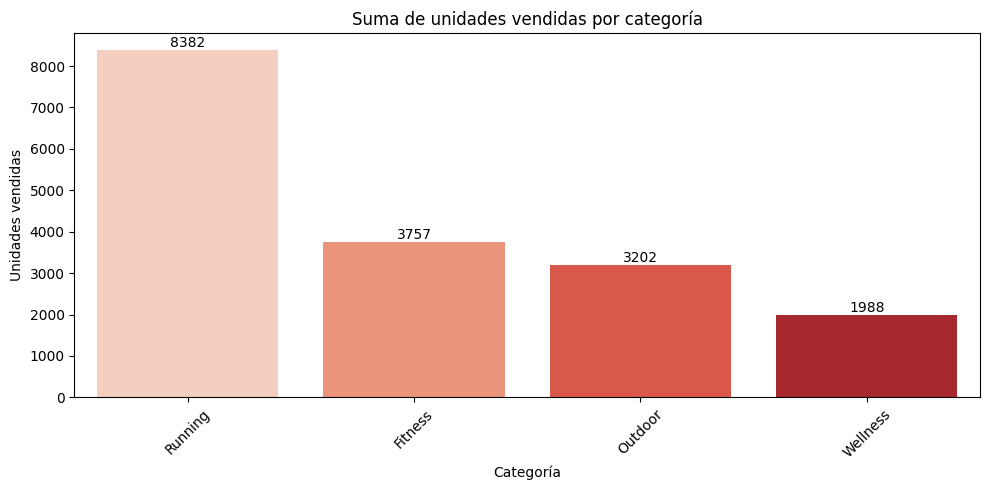

In [19]:
# Gráfico de suma de unidades vendidas por categoría
plt.figure(figsize=(10, 5))
ventas_por_categoria = df_nuevo.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False)
ax = sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='Reds')
plt.title('Suma de unidades vendidas por categoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
# Añadir etiquetas de datos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

C:\Users\dangmoz\AppData\Local\Temp\ipykernel_9776\4004761590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_subcategoria.index, y=ventas_por_subcategoria.values, palette='crest')


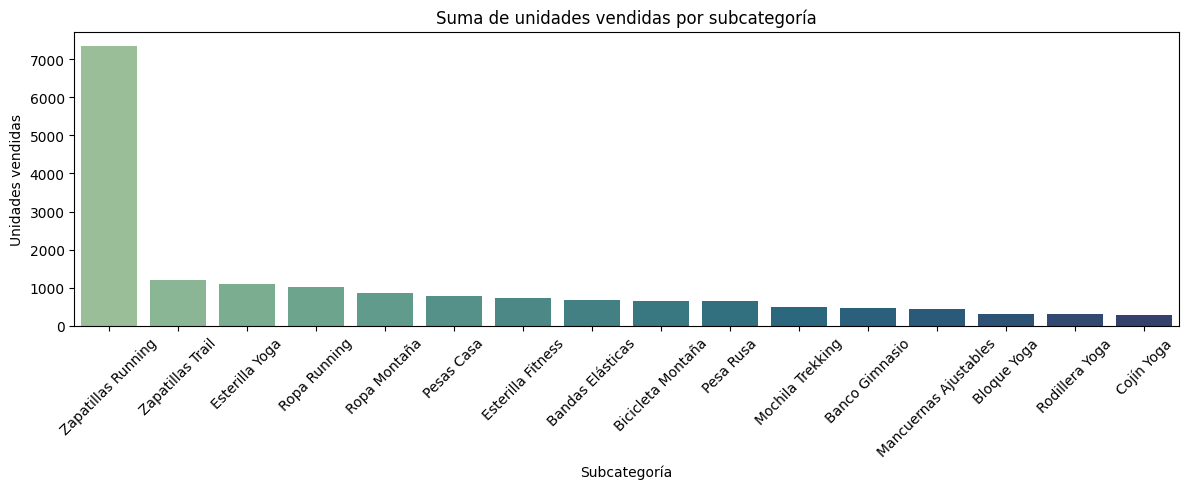

In [20]:
# Gráfico de suma de unidades vendidas por subcategoría
plt.figure(figsize=(12, 5))
ventas_por_subcategoria = df_nuevo.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False)
sns.barplot(x=ventas_por_subcategoria.index, y=ventas_por_subcategoria.values, palette='crest')
plt.title('Suma de unidades vendidas por subcategoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Subcategoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dangmoz\AppData\Local\Temp\ipykernel_9776\3655809075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.index.astype(str), y=top_productos.values, palette='rocket')


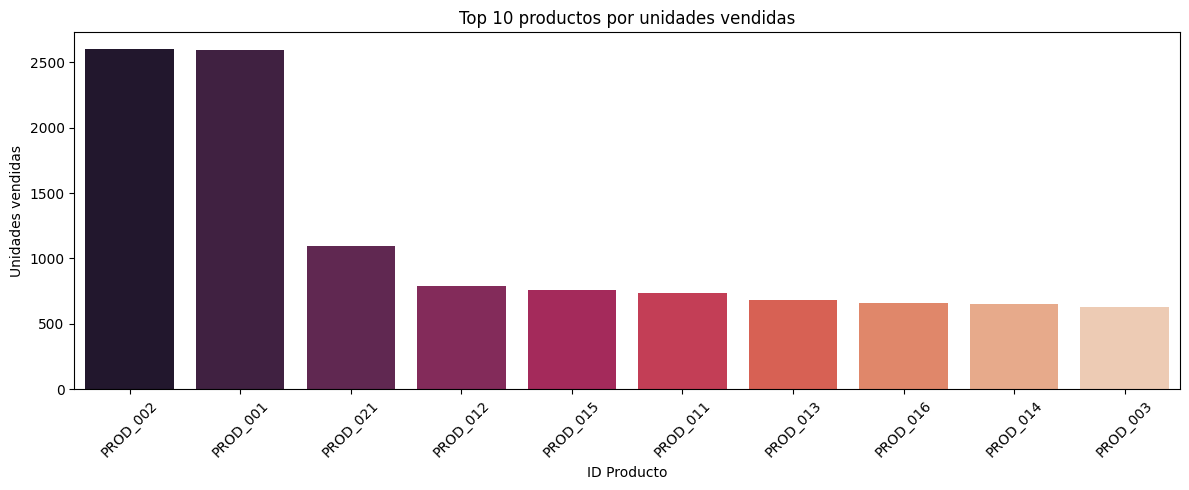

In [21]:
# Gráfico de los top productos por unidades vendidas
plt.figure(figsize=(12, 5))
top_n = 10
top_productos = df_nuevo.groupby('producto_id')['unidades_vendidas'].sum().sort_values(ascending=False).head(top_n)
sns.barplot(x=top_productos.index.astype(str), y=top_productos.values, palette='rocket')
plt.title(f'Top {top_n} productos por unidades vendidas')
plt.ylabel('Unidades vendidas')
plt.xlabel('ID Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

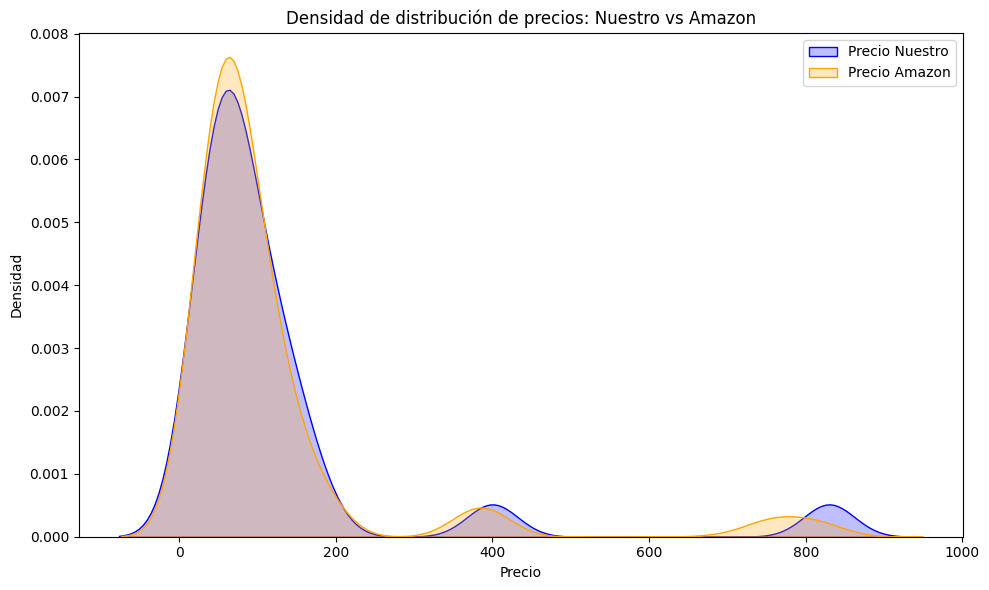

In [22]:
# Análisis de la densidad de distribución de los precios propios y los de Amazon
plt.figure(figsize=(10, 6))
sns.kdeplot(df_nuevo['precio_base'], label='Precio Nuestro', fill=True, color='blue')
sns.kdeplot(df_nuevo['Amazon'], label='Precio Amazon', fill=True, color='orange')
plt.title('Densidad de distribución de precios: Nuestro vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

## Fase de Preparacion de Datos

Creando las variables temporales y de calendario usando Holidays (Festivos y Eventos especiales) para España

In [23]:
# Creación de variables temporales y de calendario usando holidays para España
import holidays
from datetime import timedelta

# Variables temporales básicas
df_nuevo['año'] = df_nuevo['fecha'].dt.year
df_nuevo['mes'] = df_nuevo['fecha'].dt.month
df_nuevo['dia_mes'] = df_nuevo['fecha'].dt.day
df_nuevo['dia_semana'] = df_nuevo['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_nuevo['nombre_dia_semana'] = df_nuevo['fecha'].dt.day_name()
df_nuevo['semana_año'] = df_nuevo['fecha'].dt.isocalendar().week
df_nuevo['trimestre'] = df_nuevo['fecha'].dt.quarter
df_nuevo['es_fin_semana'] = df_nuevo['dia_semana'].isin([5, 6])  # Sábado o Domingo
# Festivos en España
festivos_es = holidays.country_holidays('ES', years=df_nuevo['año'].unique())
df_nuevo['es_festivo'] = df_nuevo['fecha'].isin(festivos_es)
# Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    # Último viernes de noviembre para el año de la fecha
    nov = fecha.replace(month=11, day=1)
    ultimo_viernes = max([nov + timedelta(days=i) for i in range(30) if (nov + timedelta(days=i)).weekday() == 4])
    return fecha == ultimo_viernes
df_nuevo['es_Black_Friday'] = df_nuevo['fecha'].apply(es_black_friday)
# Cyber Monday (lunes siguiente a Black Friday)
def es_cyber_monday(fecha):
    # Cyber Monday es el lunes después de Black Friday
    nov = fecha.replace(month=11, day=1)
    ultimo_viernes = max([nov + timedelta(days=i) for i in range(30) if (nov + timedelta(days=i)).weekday() == 4])
    cyber_monday = ultimo_viernes + timedelta(days=3)
    return fecha == cyber_monday
df_nuevo['es_Cyber_Monday'] = df_nuevo['fecha'].apply(es_cyber_monday)
# Variable: es_inicio_mes
df_nuevo['es_inicio_mes'] = df_nuevo['dia_mes'] == 1
# Variable: es_fin_mes
df_nuevo['es_fin_mes'] = df_nuevo['fecha'] == df_nuevo['fecha'] + pd.offsets.MonthEnd(0)
# Variable: es_inicio_trimestre
df_nuevo['es_inicio_trimestre'] = df_nuevo['mes'].isin([1, 4, 7, 10]) & (df_nuevo['dia_mes'] == 1)
# Variable: es_fin_trimestre
df_nuevo['es_fin_trimestre'] = df_nuevo['mes'].isin([3, 6, 9, 12]) & (df_nuevo['fecha'] == df_nuevo['fecha'] + pd.offsets.MonthEnd(0))
# Variable: es_verano (junio, julio, agosto)
df_nuevo['es_verano'] = df_nuevo['mes'].isin([6, 7, 8])
# Variable: es_navidad (24-26 diciembre)
df_nuevo['es_navidad'] = df_nuevo['fecha'].dt.month == 12 & df_nuevo['fecha'].dt.day.isin([24, 25, 26])
# Mostrar las primeras filas con las nuevas variables
df_nuevo.head()

C:\Users\dangmoz\AppData\Local\Temp\ipykernel_9776\3803493027.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_nuevo['es_festivo'] = df_nuevo['fecha'].isin(festivos_es)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_fin_semana,es_festivo,es_Black_Friday,es_Cyber_Monday,es_inicio_mes,es_fin_mes,es_inicio_trimestre,es_fin_trimestre,es_verano,es_navidad
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,False,False,False,False,False,False,False,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,False,False,False,False,False,False,False,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,False,False,False,False,False,False,False,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,False,False,False,False,False,False,False,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Cuantos registros existen en Dataframe Nuevo (columnas y filas)
df_nuevo.shape

(3552, 30)

In [37]:
# Numero de registros por año
df_nuevo.groupby('año').size()

año
2021    888
2022    888
2023    888
2024    888
dtype: int64

In [41]:
# Creación de lags y media móvil de 7 días para unidades vendidas, por año
lags = range(1, 8)
df_lags = []
for año, df_año in df_nuevo.groupby('año'):
    df_año = df_año.sort_values('fecha')
    # Crear lags de unidades vendidas
    for lag in lags:
        df_año[f'unidades_vendidas_lag_{lag}'] = df_año['unidades_vendidas'].shift(lag)
    # Media móvil de 7 días
    df_año['unidades_vendidas_ma7'] = df_año['unidades_vendidas'].rolling(window=7).mean()
    df_lags.append(df_año)
df_nuevo_lags = pd.concat(df_lags)
# Eliminar registros con nulos en las nuevas variables de lags o media móvil
cols_lags_ma = [f'unidades_vendidas_lag_{lag}' for lag in lags] + ['unidades_vendidas_ma7']
df_nuevo_lags = df_nuevo_lags.dropna(subset=cols_lags_ma)
# Mostrar las primeras filas con los lags y la media móvil
df_nuevo_lags.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_verano,es_navidad,unidades_vendidas_lag_1,unidades_vendidas_lag_2,unidades_vendidas_lag_3,unidades_vendidas_lag_4,unidades_vendidas_lag_5,unidades_vendidas_lag_6,unidades_vendidas_lag_7,unidades_vendidas_ma7
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,False,False,1.0,2.0,5.0,1.0,1.0,1.0,6.0,1.714286
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,False,False,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.857143
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,False,False,2.0,1.0,1.0,2.0,5.0,1.0,1.0,2.142857
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,False,False,3.0,2.0,1.0,1.0,2.0,5.0,1.0,2.285714
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,False,False,2.0,3.0,2.0,1.0,1.0,2.0,5.0,1.857143


In [42]:
# Crear variable de descuento porcentaje
# Formula ((precio_venta - precio_base) / precio_base) * 100
df_nuevo_lags['descuento_porcentaje'] = ((df_nuevo_lags['precio_venta'] - df_nuevo_lags['precio_base']) / df_nuevo_lags['precio_base']) * 100

# Crear variable precio_competencia (promedio de Amazon, Decathlon, deporvillage)
competidores = ['Amazon', 'Decathlon', 'Deporvillage']

df_nuevo_lags['precio_competencia'] = df_nuevo_lags[competidores].mean(axis=1)

# Crear variable ratio_precio (nuestro precio / precio competencia)
df_nuevo_lags['ratio_precio'] = df_nuevo_lags['precio_venta'] / df_nuevo_lags['precio_competencia']

# Eliminar variables de Amazon, Decathlon, deporvillage
df_nuevo_lags = df_nuevo_lags.drop(columns=competidores)

# Mostrar las primeras filas con las nuevas variables
df_nuevo_lags[['fecha', 'producto_id', 'precio_base', 'precio_venta', 'precio_competencia', 'ratio_precio', 'descuento_porcentaje']].head()

,fecha,producto_id,precio_base,precio_venta,precio_competencia,ratio_precio,descuento_porcentaje
16,2021-10-25,PROD_017,95,96.56,92.636667,1.042352,1.642105
15,2021-10-25,PROD_016,830,821.29,735.070000,1.117295,-1.049398
14,2021-10-25,PROD_015,150,154.22,135.673333,1.136701,2.813333
13,2021-10-25,PROD_014,40,39.74,39.460000,1.007096,-0.650000
12,2021-10-25,PROD_013,25,24.79,24.096667,1.028773,-0.840000


### Crear variables con sufijo _h y aplicar One Hot Encoding
Se crean columnas `nombre_h`, `categoria_h` y `subcategoria_h` (si existen las columnas origen). Luego se aplica One Hot Encoding a esas columnas y se concatenan los dummies al DataFrame.

In [45]:
# Crear columnas *_h (añadir sufijo) y aplicar One Hot Encoding (pandas.get_dummies)
cols_to_check = ['nombre', 'categoria', 'subcategoria']

# Soportar variantes con tilde en la columna (e.g., 'categoría', 'subcategoría')
cols_found = []
df_target_name = 'df_nuevo_lags' if 'df_nuevo_lags' in globals() else ('df_nuevo' if 'df_nuevo' in globals() else None)
if df_target_name is None:
    raise NameError('No se encontró ni `df_nuevo_lags` ni `df_nuevo`. Ejecuta las celdas anteriores que generan el DataFrame.')
df_target = globals()[df_target_name]

for c in cols_to_check:
    if c in df_target.columns:
        cols_found.append(c)
    else:
        # intentar con tilde si aplica
        alt = c.replace('categoria', 'categoría').replace('subcategoria', 'subcategoría')
        if alt != c and alt in df_target.columns:
            cols_found.append(alt)
        else:
            print(f'Columna origen no encontrada: {c} (comprobar nombre)')

# Crear columnas *_h y convertir a string
for c in cols_found:
    new_col = f"{c}_h"
    df_target[new_col] = df_target[c].astype(str) + '_h'

# Aplicar One Hot Encoding a las columnas *_h
cols_h = [f"{c}_h" for c in cols_found]
dummies_list = []
for c in cols_h:
    if c in df_target.columns:
        d = pd.get_dummies(df_target[c], prefix=c, prefix_sep='_', dummy_na=False)
        dummies_list.append(d)

if len(dummies_list) > 0:
    df_dummies = pd.concat(dummies_list, axis=1)
    df_target = pd.concat([df_target, df_dummies], axis=1)
    print(f'One Hot Encoding aplicado a: {cols_h}. Dummies añadidos: {len(df_dummies.columns)}')
else:
    print('No se encontraron columnas *_h para codificar con One Hot Encoding.')

# Volver a asignar al DataFrame original
if df_target_name == 'df_nuevo_lags':
    df_nuevo_lags = df_target
else:
    df_nuevo = df_target

# Mostrar las columnas recien creadas y una vista previa
ohe_cols = [c for c in df_target.columns if any(c.startswith(f'{col}_h_') for col in cols_found)]
print('Número de columnas OHE:', len(ohe_cols))
display(df_target[[c for c in df_target.columns if c in cols_h or c in ohe_cols]].head())

One Hot Encoding aplicado a: ['nombre_h', 'categoria_h', 'subcategoria_h']. Dummies añadidos: 44
Número de columnas OHE: 44


,nombre_h,categoria_h,subcategoria_h,nombre_h_Adidas Own The Run Jacket_h,nombre_h_Adidas Ultraboost 23_h,nombre_h_Asics Gel Nimbus 25_h,nombre_h_Bowflex SelectTech 552_h,nombre_h_Columbia Silver Ridge_h,nombre_h_Decathlon Bandas Elásticas Set_h,nombre_h_Domyos BM900_h,...,subcategoria_h_Esterilla Yoga_h,subcategoria_h_Mancuernas Ajustables_h,subcategoria_h_Mochila Trekking_h,subcategoria_h_Pesa Rusa_h,subcategoria_h_Pesas Casa_h,subcategoria_h_Rodillera Yoga_h,subcategoria_h_Ropa Montaña_h,subcategoria_h_Ropa Running_h,subcategoria_h_Zapatillas Running_h,subcategoria_h_Zapatillas Trail_h
16,The North Face Borealis_h,Outdoor_h,Mochila Trekking_h,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
15,Trek Marlin 7_h,Outdoor_h,Bicicleta Montaña_h,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,Salomon Speedcross 5 GTX_h,Outdoor_h,Zapatillas Trail_h,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13,Sveltus Kettlebell 12kg_h,Fitness_h,Pesa Rusa_h,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12,Decathlon Bandas Elásticas Set_h,Fitness_h,Bandas Elásticas_h,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Guardar df_nuevo procesado en data/processed
from pathlib import Path

processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# Elegir el DataFrame procesado: preferimos df_nuevo_lags si existe
df_to_save = globals().get('df_nuevo_lags', globals().get('df_nuevo', None))
if df_to_save is None:
    raise NameError('No se encontró ni `df_nuevo_lags` ni `df_nuevo`. Ejecuta las celdas previas para generar el DataFrame antes de guardarlo.')

csv_path = processed_dir / 'df_nuevo.csv'
parquet_path = processed_dir / 'df_nuevo.parquet'

# Guardar CSV
df_to_save.to_csv(csv_path, index=False)
print(f'CSV guardado en: {csv_path}')

# Intentar guardar parquet (más eficiente, pero puede fallar si hay tipos no compatibles)
try:
    df_to_save.to_parquet(parquet_path, index=False)
    print(f'Parquet guardado en: {parquet_path}')
except Exception as e:
    print(f'No se pudo guardar Parquet: {e}')

display(df_to_save.head())

CSV guardado en: ..\data\processed\df_nuevo.csv
Parquet guardado en: ..\data\processed\df_nuevo.parquet


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga_h,subcategoria_h_Mancuernas Ajustables_h,subcategoria_h_Mochila Trekking_h,subcategoria_h_Pesa Rusa_h,subcategoria_h_Pesas Casa_h,subcategoria_h_Rodillera Yoga_h,subcategoria_h_Ropa Montaña_h,subcategoria_h_Ropa Running_h,subcategoria_h_Zapatillas Running_h,subcategoria_h_Zapatillas Trail_h
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,False,False,True,False,False,False,False,False,False,False
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,False,False,False,False,False,False,False,False,False,False
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,False,False,False,False,False,False,False,False,False,True
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,False,False,False,True,False,False,False,False,False,False
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                3552 non-null   datetime64[ns]
 1   producto_id          3552 non-null   object        
 2   nombre               3552 non-null   object        
 3   categoria            3552 non-null   object        
 4   subcategoria         3552 non-null   object        
 5   precio_base          3552 non-null   int64         
 6   es_estrella          3552 non-null   bool          
 7   unidades_vendidas    3552 non-null   int64         
 8   precio_venta         3552 non-null   float64       
 9   ingresos             3552 non-null   float64       
 10  Amazon               3552 non-null   float64       
 11  Decathlon            3552 non-null   float64       
 12  Deporvillage         3552 non-null   float64       
 13  dia_semana           3552 non-nul

In [48]:
df_nuevo.columns

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos', 'Amazon', 'Decathlon', 'Deporvillage', 'dia_semana', 'año',
       'mes', 'dia_mes', 'nombre_dia_semana', 'semana_año', 'trimestre',
       'es_fin_semana', 'es_festivo', 'es_Black_Friday', 'es_Cyber_Monday',
       'es_inicio_mes', 'es_fin_mes', 'es_inicio_trimestre',
       'es_fin_trimestre', 'es_verano', 'es_navidad'],
      dtype='object')